In [5]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [19]:
# Data collection
data = pd.read_csv('winequality-red.csv', sep=';', index_col=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


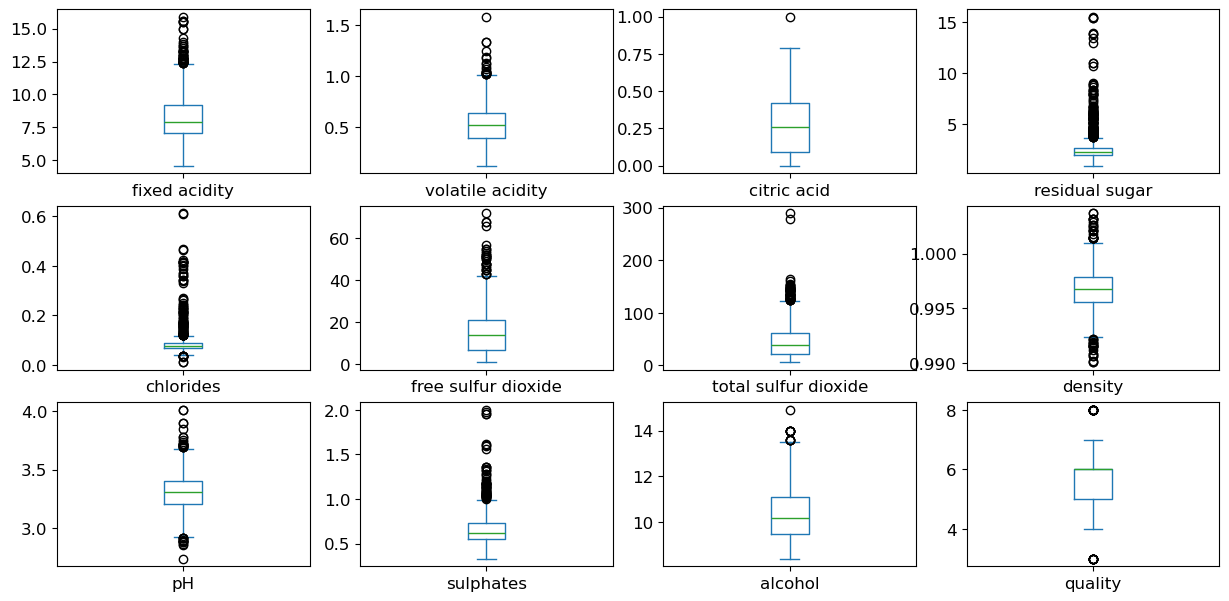

In [18]:
# Data preprocessing

data.describe() # column with possible outliers - free sulphur dioxide, total sulfur dioxide, residual sugar, 
data_mean = data.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
sharey=False, fontsize=12, figsize=(15,20));
#cap_value = data['quality'].quantile(0.95)
#print(cap_value)

#data['quality_capped'] = data['quality'].clip(upper=cap_value)
#data.head()

In [3]:
# Linear regression


In [4]:
# Support Vector Machine


In [5]:
# Decision Trees


In [ ]:
# Mulit-layer Perceptron Neutral Network